# Sales Performance & Revenue Optimization Analysis

In [1]:

import os

BASE_DIR = os.getcwd()

OUTPUT_DIR = os.path.join(BASE_DIR, "outputs")
CHART_DIR = os.path.join(OUTPUT_DIR, "charts")
DATA_DIR = os.path.join(OUTPUT_DIR, "data")

os.makedirs(CHART_DIR, exist_ok=True)
os.makedirs(DATA_DIR, exist_ok=True)

print("Charts will be saved to:", CHART_DIR)
print("Clean data will be saved to:", DATA_DIR)


Charts will be saved to: C:\Users\hp\Desktop\Project_1_sales-performance-analysis\Notebooks\outputs\charts
Clean data will be saved to: C:\Users\hp\Desktop\Project_1_sales-performance-analysis\Notebooks\outputs\data


In [2]:

import matplotlib.pyplot as plt

def save_chart(filename):
    path = os.path.join(CHART_DIR, filename)
    plt.tight_layout()
    plt.savefig(path, dpi=150)
    print(f"Chart saved to: {path}")


## 1. Business Problem
Head of Sales wants to understand revenue drivers, underperformance, and risks to improve next quarter decisions.

## 2. Key Business Questions
1. Revenue and order trends
2. Product performance
3. Regional performance
4. Sales rep performance
5. Customer segment profitability
6. Seasonality
7. Discount impact
8. Revenue concentration risk

## 3. Data Loading

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(
    r"C:/Users/hp/Desktop/Project_1_sales-performance-analysis/Data/superstore_sales.csv",
    encoding="latin1"
)

df.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 4. Data Quality & ETL

In [4]:

df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:

# Data cleaning
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df['Revenue'] = df['Sales']


## 5. Feature Engineering

In [6]:

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.to_period('M')
df['Quarter'] = df['Order Date'].dt.to_period('Q')


## 6. Core KPIs

In [7]:

total_revenue = df['Revenue'].sum()
total_orders = df['Order ID'].nunique()
avg_order_value = total_revenue / total_orders

total_revenue, total_orders, avg_order_value


(np.float64(2297200.8603000003), 5009, np.float64(458.61466566180883))

## 7. Revenue Trend Analysis

Chart saved to: C:\Users\hp\Desktop\Project_1_sales-performance-analysis\Notebooks\outputs\charts\monthly_revenue_trend.png


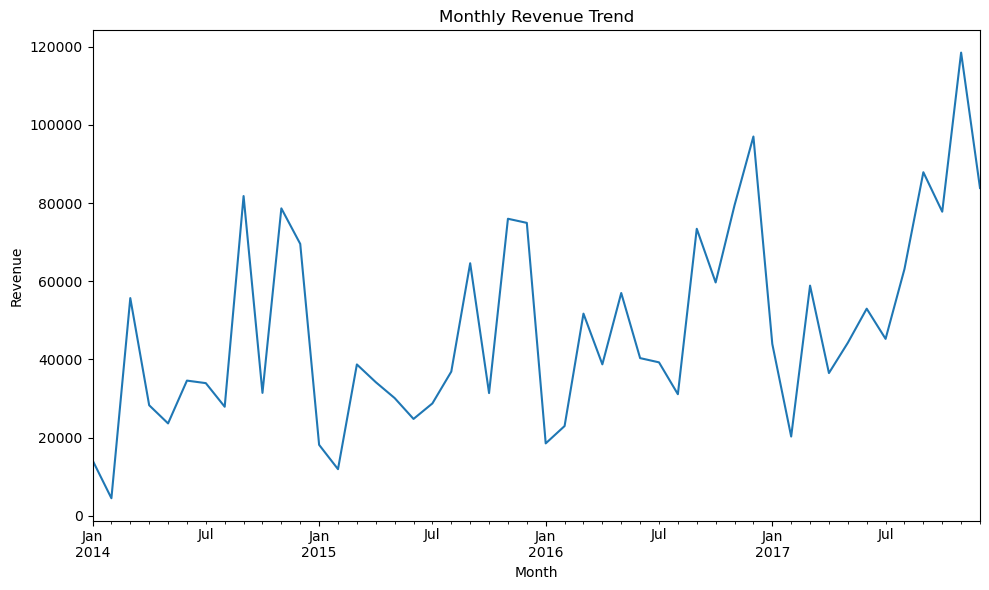

In [17]:

monthly_revenue = df.groupby('Month')['Revenue'].sum()

plt.figure(figsize=(10,6))
monthly_revenue.plot(kind='line')

plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")

plt.tight_layout()

# Save chart to outputs/charts
save_chart("monthly_revenue_trend.png")

plt.show()



## 8. Product Performance

In [9]:

product_perf = df.groupby('Product Name')['Revenue'].sum().sort_values(ascending=False).head(10)
product_perf


Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Revenue, dtype: float64

## 9. Regional Performance

In [10]:

region_perf = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)
region_perf


Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Revenue, dtype: float64

## 10. Customer Segment Analysis

In [11]:
segment_perf = df.groupby('Segment')[['Revenue', 'Profit']].sum()
segment_perf

,Revenue,Profit
Segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


## 11. Discount Impact

In [12]:
discount_impact = (
    df.groupby(
        pd.cut(df['Discount'], bins=[0, 0.1, 0.3, 1]),
        observed=True
    )['Profit']
    .mean()
)

discount_impact


Discount
(0.0, 0.1]     96.055074
(0.1, 0.3]     20.677597
(0.3, 1.0]   -107.209930
Name: Profit, dtype: float64

## 12. Revenue Concentration

In [13]:

top_customers = df.groupby('Customer Name')['Revenue'].sum().sort_values(ascending=False).head(10)
top_customers


Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Revenue, dtype: float64

## 13. Key Insights & Conclusions
- Revenue concentrated in few products and customers
- High discounts reduce profit
- Certain regions underperform
- Seasonal patterns visible

In [15]:

# ==============================
# Standardize Column Names
# ==============================

df_clean = df.copy()

df_clean.columns = (
    df_clean.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("-", "_")
)

print("Final columns:", df_clean.columns.tolist())

# ==============================
# Export Clean Dataset for Power BI
# ==============================

export_cols = [
    "order_id",
    "order_date",
    "ship_date",
    "customer_name",
    "segment",
    "region",
    "product_name",
    "category",
    "sub_category",
    "quantity",
    "sales",      # original Superstore uses 'sales'
    "discount",
    "profit"
]

df_powerbi = df_clean[export_cols].copy()

# Rename 'sales' -> 'revenue' for BI consistency
df_powerbi = df_powerbi.rename(columns={"sales": "revenue"})

powerbi_path = os.path.join(DATA_DIR, "sales_powerbi.csv")
df_powerbi.to_csv(powerbi_path, index=False)

print("Power BI file saved to:", powerbi_path)
df_powerbi.head()



Final columns: ['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub_category', 'product_name', 'sales', 'quantity', 'discount', 'profit', 'revenue', 'year', 'month', 'quarter']
Power BI file saved to: C:\Users\hp\Desktop\Project_1_sales-performance-analysis\Notebooks\outputs\data\sales_powerbi.csv


,order_id,order_date,ship_date,customer_name,segment,region,product_name,category,sub_category,quantity,revenue,discount,profit
0,CA-2016-152156,2016-11-08,2016-11-11,Claire Gute,Consumer,South,Bush Somerset Collection Bookcase,Furniture,Bookcases,2,261.9600,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Claire Gute,Consumer,South,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs,3,731.9400,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Darrin Van Huff,Corporate,West,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels,2,14.6200,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Sean O'Donnell,Consumer,South,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables,5,957.5775,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Sean O'Donnell,Consumer,South,Eldon Fold 'N Roll Cart System,Office Supplies,Storage,2,22.3680,0.20,2.5164


In [16]:
print("Final columns:", df_clean.columns.tolist())

Final columns: ['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub_category', 'product_name', 'sales', 'quantity', 'discount', 'profit', 'revenue', 'year', 'month', 'quarter']
